# Mecânica dos Solos
---

>Aula Youtube:
>>[Vídeo](https://www.youtube.com/watch?v=JTIODA7Nft4)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('bmh')

## 001

In [2]:
Niveis_001 = {
    'Pontos' : ['Superficie', 'A', 'B', 'C'],
    'Profundidade' : [0, 3, 7, 13],
    'Peso Especifico' : [0, 1.3, 1.96, 1.59],
}
Niveis_001

{'Pontos': ['Superficie', 'A', 'B', 'C'],
 'Profundidade': [0, 3, 7, 13],
 'Peso Especifico': [0, 1.3, 1.96, 1.59]}

In [3]:
DF_Niveis_001 = pd.DataFrame(Niveis_001)
DF_Niveis_001

,Pontos,Profundidade,Peso Especifico
0,Superficie,0,0.00
1,A,3,1.30
2,B,7,1.96
3,C,13,1.59


## Tensão Total

In [4]:
DF_Niveis_001['Desnivel'] = DF_Niveis_001['Profundidade'] - DF_Niveis_001['Profundidade'].shift()
DF_Niveis_001['Desnivel'] = DF_Niveis_001['Desnivel'].fillna(0)

DF_Niveis_001['Tensao Total'] = [0 for _ in DF_Niveis_001.index]
DF_Niveis_001['Tensao Total'] = (DF_Niveis_001['Desnivel'] * DF_Niveis_001['Peso Especifico'])

DF_Niveis_001['Tensao Total'] = DF_Niveis_001['Tensao Total'].cumsum()

DF_Niveis_001 = DF_Niveis_001.fillna(0)

DF_Niveis_001

,Pontos,Profundidade,Peso Especifico,Desnivel,Tensao Total
0,Superficie,0,0.00,0.0,0.00
1,A,3,1.30,3.0,3.90
2,B,7,1.96,4.0,11.74
3,C,13,1.59,6.0,21.28


## Tensão Neutra

In [5]:
DF_Niveis_001['Presao Neutra'] = 1 * DF_Niveis_001['Profundidade']
DF_Niveis_001

,Pontos,Profundidade,Peso Especifico,Desnivel,Tensao Total,Presao Neutra
0,Superficie,0,0.00,0.0,0.00,0
1,A,3,1.30,3.0,3.90,3
2,B,7,1.96,4.0,11.74,7
3,C,13,1.59,6.0,21.28,13


## Tensão Efetiva

In [6]:
DF_Niveis_001['Tensao Efetiva'] = DF_Niveis_001['Tensao Total'] - DF_Niveis_001['Presao Neutra']
DF_Niveis_001

,Pontos,Profundidade,Peso Especifico,Desnivel,Tensao Total,Presao Neutra,Tensao Efetiva
0,Superficie,0,0.00,0.0,0.00,0,0.00
1,A,3,1.30,3.0,3.90,3,0.90
2,B,7,1.96,4.0,11.74,7,4.74
3,C,13,1.59,6.0,21.28,13,8.28


## Grafico

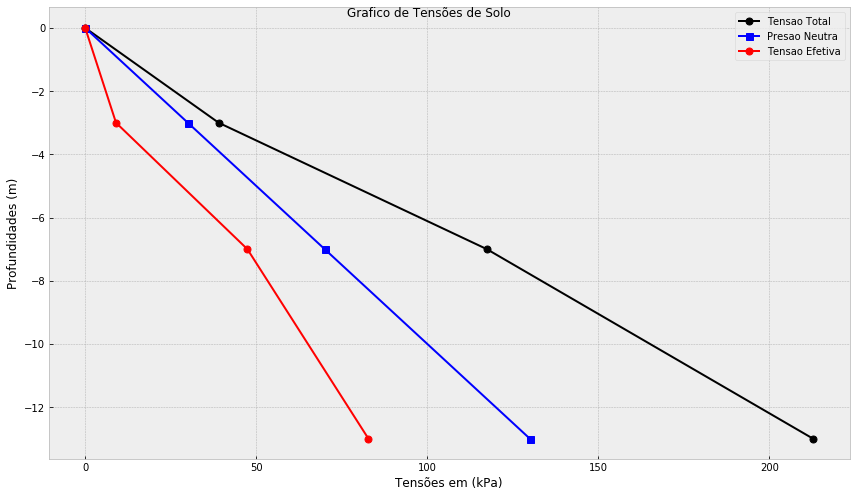

In [8]:
fig, graph = plt.subplots(nrows=1, ncols=1, figsize = (12,7))

graph.plot(DF_Niveis_001['Tensao Total'] * 10, DF_Niveis_001['Profundidade'] * -1, label='Tensao Total', color='black', marker='o', markersize=7)
graph.plot(DF_Niveis_001['Presao Neutra'] * 10, DF_Niveis_001['Profundidade'] * -1, label='Presao Neutra', color='blue', marker='s', markersize=7)
graph.plot(DF_Niveis_001['Tensao Efetiva'] * 10, DF_Niveis_001['Profundidade'] * -1, label='Tensao Efetiva', color='red', marker='o', markersize=7)

fig.suptitle('Grafico de Tensões de Solo')

graph.set_xlabel('Tensões em (kPa)')
graph.set_ylabel('Profundidades (m)')

graph.legend()

plt.tight_layout()